<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U31T1HomePriceForecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
PREVISION DEL PRECIO DE LA VIVIENDA
  REGRESION CON EL CONJUNTO DE DATOS DE PRECIOS DE LAS VIVIENDAS DEL ESTADO DE IOWA
    Usaremos el conjunto de datos de precios de viviendas de la ciudad de Ames, en Iowa, para abordar un problema de regresión.
    En este caso, se utilizarán 79 variables explicativas para predecir el valor numérico del precio de una vivienda.

    Este tipo de problema, en el que se predicen valores continuos, se conoce como problema de regresión.
    Este conjunto de datos también se utiliza en contextos profesionales para evaluaciones, y trabajar con él permite adquirir habilidades útiles para el análisis del mercado inmobiliario real.

    House Prices: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

    LISTA DE METODOS QUE SE USARAN EN ESTA PRACTICA:
    Utilizando scikit-learn, realizaremos el entrenamiento y la predicción con los siguientes métodos.
    Todos estos son modelos comunes en entornos profesionales, por lo que también se compararán sus resultados en la práctica.
    Sin embargo, en esta etapa no se abordará la teoría en profundidad.

    Dado que las librerías permiten aplicarlos fácilmente, podrás experimentar las diferencias en los resultados según el método utilizado.
        - Regresión lineal
        - SVM (Máquinas de vectores de soporte)
        - Árboles de decisión
        - Random Forest (bosque aleatorio)

    Estos modelos no solo se aplican a problemas de regresión, sino también a clasificación.
    Es importante elegir el método adecuado según el tipo de problema.

  PREPARACION DEL CONJUNTO DE DATOS:
    Al igual que en la Semana 3, descarga el conjunto de datos desde Kaggle.
    En esta práctica se utilizará únicamente el archivo train.csv.
    Además, para que sea más accesible a quienes están comenzando, se realizará también una limpieza del conjunto de datos.
    House Prices: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
'''

In [1]:
'''
PROBLEMA 1 - SELECCION DE CARACTERISTICAS PARA LA PRACTICA
  Este conjunto de datos incluye 79 tipos de características (variables explicativas), pero como primer paso, se limitará el análisis a dos características:
    GrLivArea (superficie habitable en planta baja) y
    YearBuilt (año de construcción).
  Comenzar con un modelo sencillo de esta manera facilita una mejor comprensión del modelado en un proyecto.
'''
import pandas as pd

df = pd.read_csv("train.csv")

train_df = df[["GrLivArea", "YearBuilt", "SalePrice"]]
print(train_df.head())

   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000


               0              2              4
0  235756.505055  259599.006276  271458.460191
1  217000.000000  214000.000000  263000.000000
MSE:  2468689716.4248466


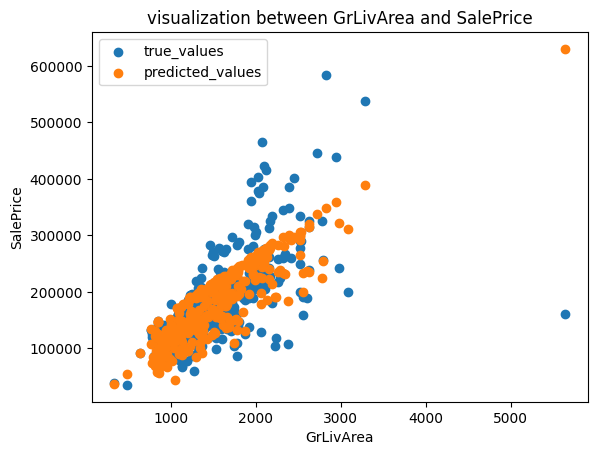

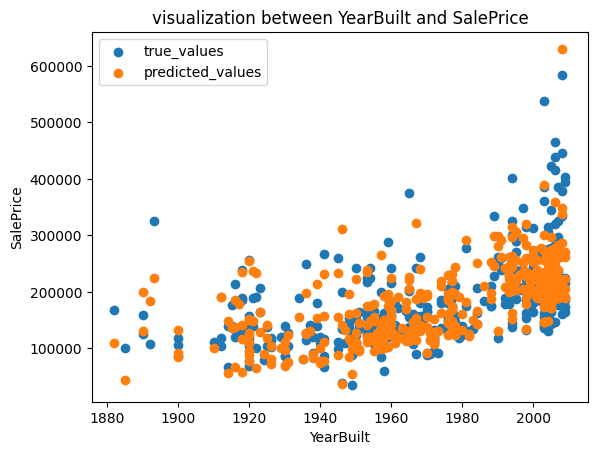

In [19]:
'''
PROBLEMA 2 - ESTIMACION AND EVALUACIACION MEDIANTE MODELO DE REGRESION LINEAL SIMPLE
  Trabajemos con los datos de manera sencilla para construir y ejecutar el flujo de entrenamiento, predicción, evaluación y visualización utilizando regresión lineal.

  Referencia: sklearn.linear_model.LinearRegression — documentación de scikit-learn 0.21.3

  Para la evaluación, es común utilizar el Error Cuadrático Medio (Mean Squared Error, MSE).
  Esta es una de las formas de medir la precisión de las predicciones del modelo y se utiliza frecuentemente en entornos reales como indicador para mejorar modelos.

  Referencia: sklearn.metrics.mean_squared_error — documentación de scikit-learn 0.21.3

  En cuanto a la visualización, es más comprensible, por ejemplo, si se usa el eje horizontal para la característica y el eje vertical para el precio de la vivienda predicho.
  Se debe usar un gráfico de dispersión para comparar los datos reales con los resultados de la predicción.
  Este tipo de visualización es esencial al presentar resultados en entornos profesionales o al explicar hallazgos a un cliente.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

train_df = df[["GrLivArea", "YearBuilt", "SalePrice"]]
X = train_df[["GrLivArea", "YearBuilt"]]
y = train_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)

result = pd.DataFrame([reg_predict, y_test])

print(result.loc[:, [0, 2, 4]])
print("MSE: ", mean_squared_error(y_test, reg_predict))

#visualization on a scatter graph
def plot_graph(xlabel, ylabel, X, y, y_true, y_pred):
    plt.title(f'visualization between {xlabel} and {ylabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(X, y_true, label = 'true_values')
    plt.scatter(X, y_pred, label = 'predicted_values')
    plt.legend()
    plt.show()


plot_graph("GrLivArea", "SalePrice", X_test["GrLivArea"], y_test, y_test, reg_predict)
plot_graph("YearBuilt", "SalePrice", X_test["YearBuilt"], y_test, y_test, reg_predict)

MSE for SVR:  6045366082.750584


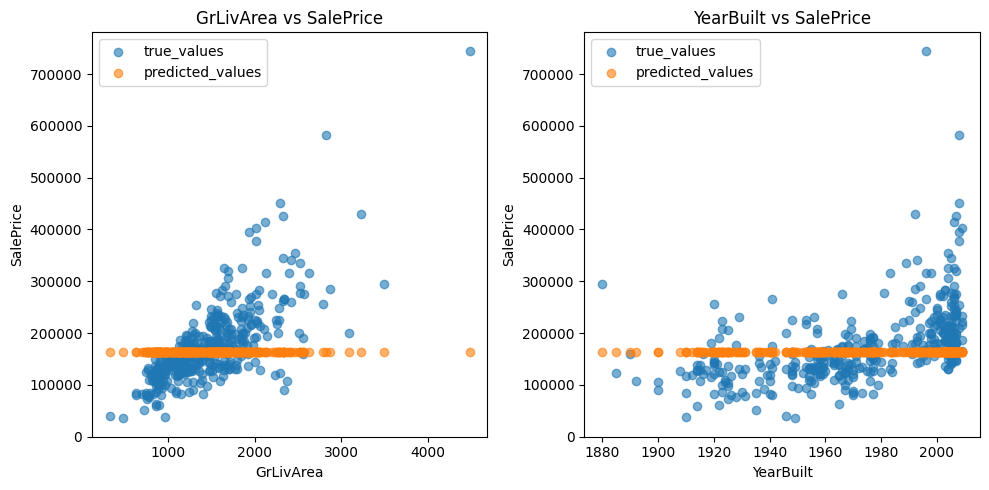

MSE for Decision Tree:  1971095801.8746576


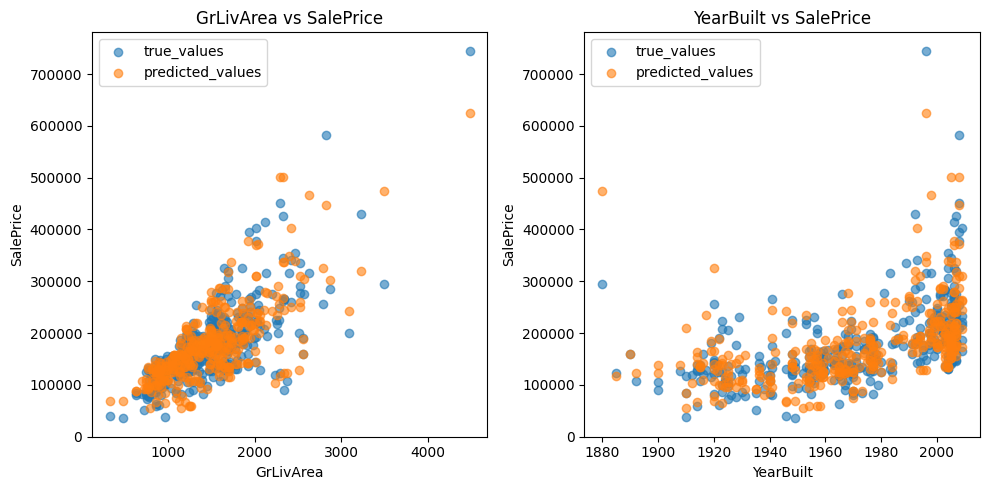

MSE for Random Forest:  1341589256.1914878


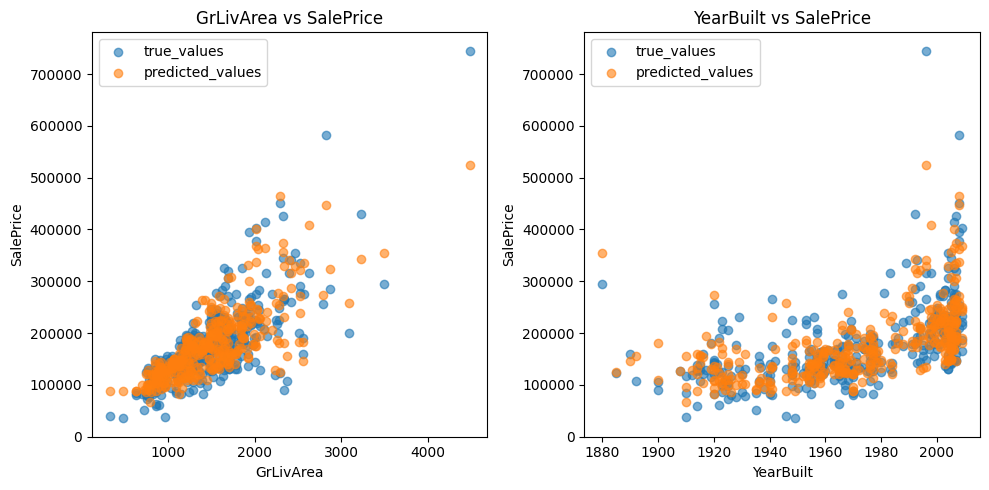

In [6]:
'''
PROBLEMA 3 - COMPARACION DE METODOS
  Para cada uno de los siguientes métodos, realiza el entrenamiento, predicción, evaluación y visualización, y resume los valores de los indicadores en una única tabla. Utilizando esa tabla y los gráficos visualizados, realiza una breve reflexión sobre los resultados. Menciona qué método tuvo mejores resultados en qué métrica, y cómo fueron los gráficos obtenidos.
    - Regresión lineal
    - SVM
    - Árbol de decisión
    - Random Forest (Bosque Aleatorio)

  A continuación se encuentran los enlaces a la documentación oficial. En un entorno real, se realizaría el ajuste de hiperparámetros, pero en este caso, se ejecutarán los modelos con los valores por defecto. El objetivo es captar las características básicas de cada método.
    - sklearn.linear_model.LinearRegression — documentación de scikit-learn 0.21.3
    - sklearn.svm.SVR — documentación de scikit-learn 0.21.3
    - sklearn.tree.DecisionTreeRegressor — documentación de scikit-learn 0.21.3
    - sklearn.ensemble.RandomForestRegressor — documentación de scikit-learn 0.21.3

  Estos métodos también se utilizan en problemas de clasificación, pero para los problemas de regresión existen bibliotecas especializadas adaptadas a este tipo de tareas.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#visualization on a scatter graph
#visualization on a scatter graph
def plot_graph(X, y_true, y_pred, target_name="SalePrice"):
    num_vars = X.shape[1]
    fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 5))

    if num_vars == 1:
        axes = [axes]

    for i, column in enumerate(X.columns):
        axes[i].set_title(f'{column} vs {target_name}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_name)
        axes[i].scatter(X[column], y_true, label='true_values', alpha=0.6)
        axes[i].scatter(X[column], y_pred, label='predicted_values', alpha=0.6)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

df = pd.read_csv("train.csv")

train_df = df[["GrLivArea", "YearBuilt", "SalePrice"]]
X = train_df[["GrLivArea", "YearBuilt"]]
y = train_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# for svr
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print("MSE for SVR: ", mean_squared_error(y_test, svr_predict))
plot_graph(X_test, y_test, svr_predict)

# for decision tree
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree_predict = d_tree.predict(X_test)
print("MSE for Decision Tree: ", mean_squared_error(y_test, d_tree_predict))
plot_graph(X_test, y_test, d_tree_predict)


# for random forest
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)
print("MSE for Random Forest: ", mean_squared_error(y_test, rand_forest_predict))
plot_graph(X_test, y_test, rand_forest_predict)

MSE for Linear Regression:  1895036340.6245759


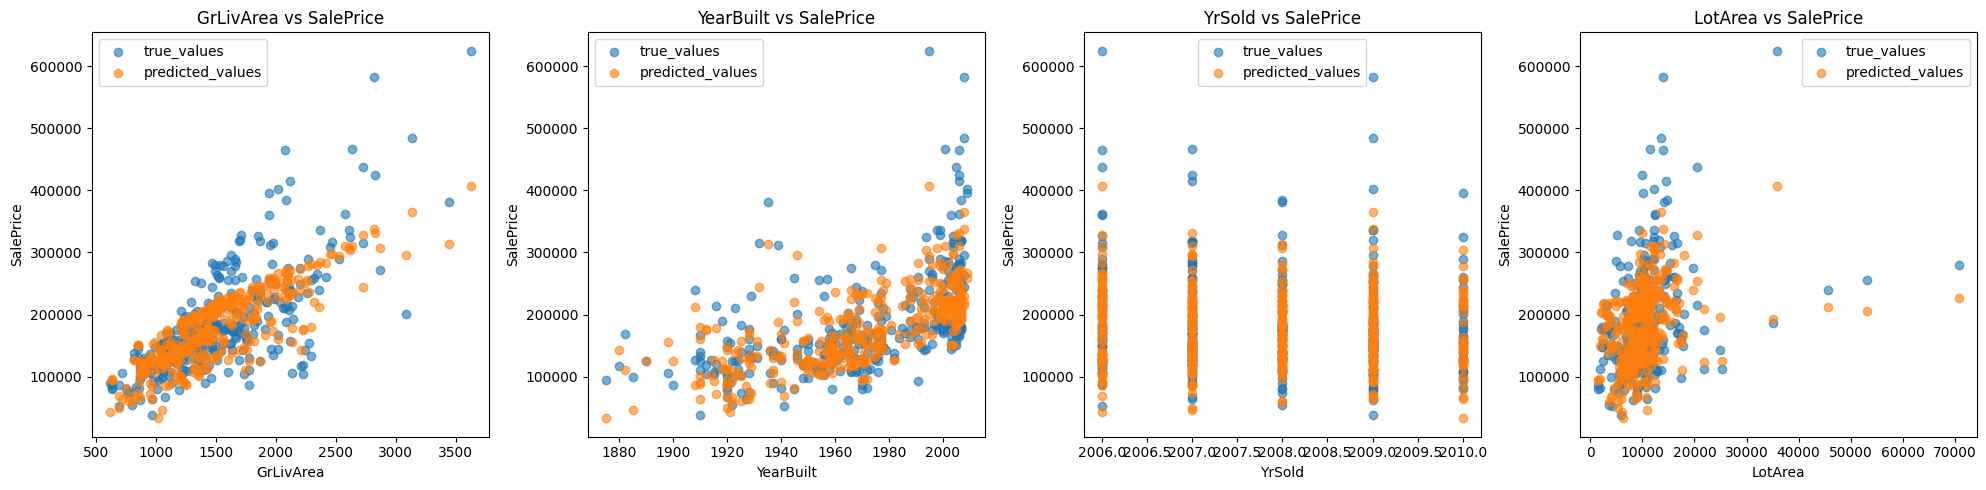

MSE for SVR:  6737043830.017857


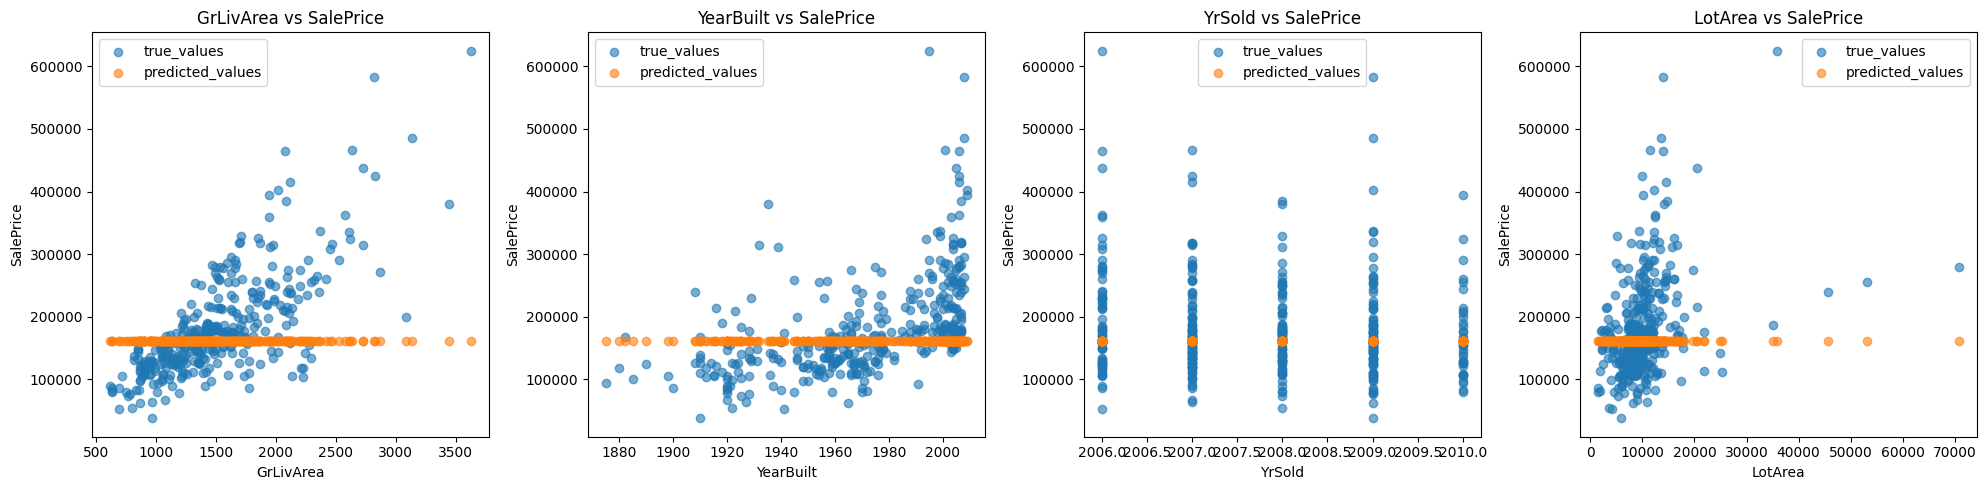

MSE for Decision Tree:  2192068776.9150686


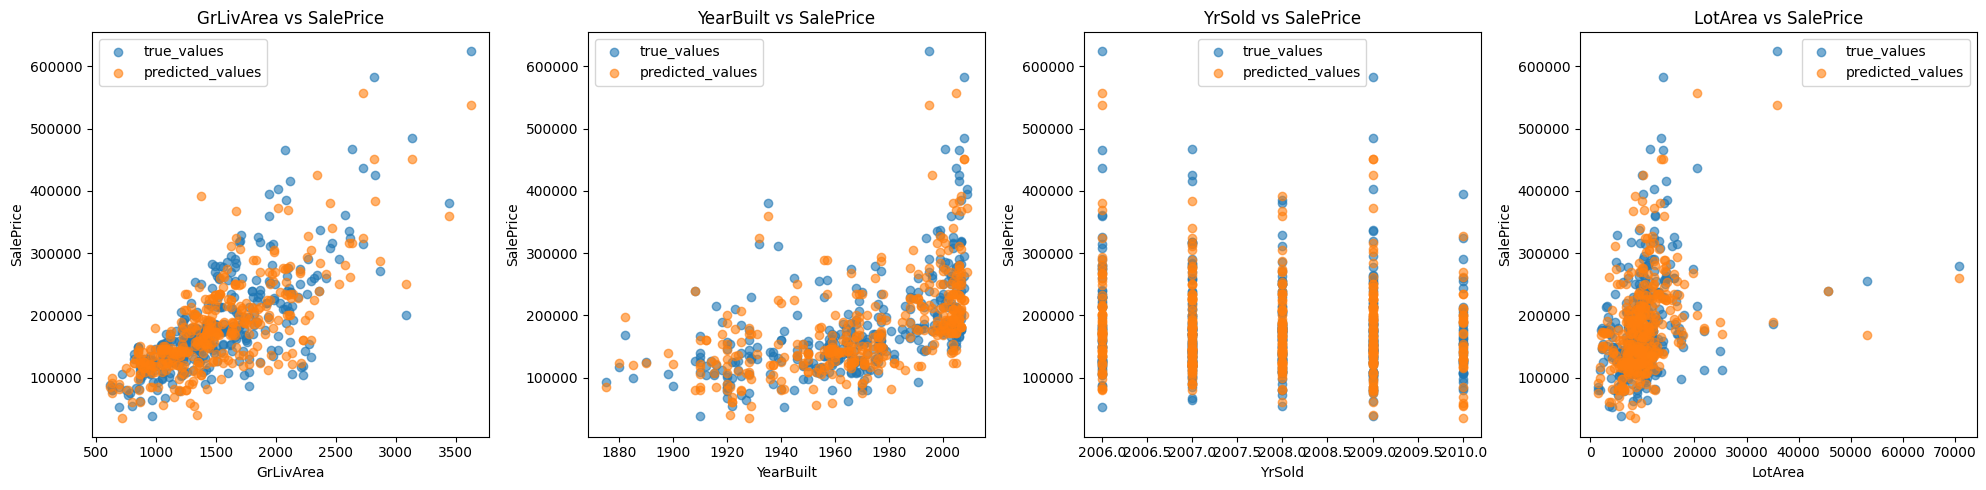

MSE for Random Forest:  1231134453.1878717


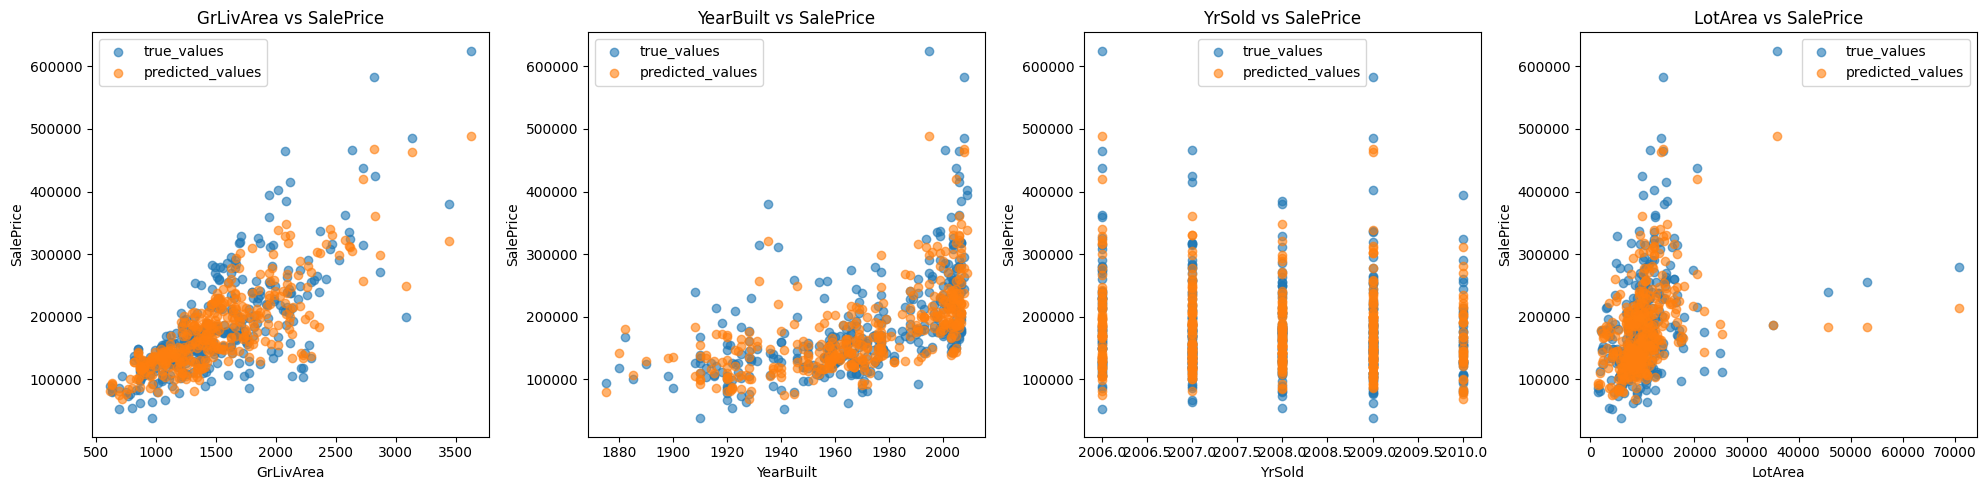

In [7]:
'''
PROBLEMA 4 - APRENDIZAJE UTILIZANDO OTRAS CARACTERISTICAS (TAREAS AVANZADAS)
  Hasta ahora hemos utilizado solo dos características para fines de práctica, pero ahora explora qué sucede al agregar otras características. Elegir qué características utilizar y cómo procesarlas es un punto clave en el análisis de datos.

  Estas decisiones deben tomarse mediante la experimentación y el análisis. En aplicaciones reales, también se pueden utilizar como referencia los Notebooks de Kaggle.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#visualization on a scatter graph
def plot_graph(X, y_true, y_pred, target_name="SalePrice"):
    num_vars = X.shape[1]
    fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 5))  # 1 fila, n columnas

    # Si solo hay una variable, convertir axes a lista para iterar de forma uniforme
    if num_vars == 1:
        axes = [axes]

    for i, column in enumerate(X.columns):
        axes[i].set_title(f'{column} vs {target_name}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_name)
        axes[i].scatter(X[column], y_true, label='true_values', alpha=0.6)
        axes[i].scatter(X[column], y_pred, label='predicted_values', alpha=0.6)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

df = pd.read_csv("train.csv")

train_df = df[["GrLivArea", "YearBuilt", "LotArea", "YrSold", "SalePrice"]]
X = train_df[["GrLivArea", "YearBuilt", "YrSold", "LotArea"]]
y = train_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# For linear regression
reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)
print("MSE for Linear Regression: ", mean_squared_error(y_test, reg_predict))
plot_graph(X_test, y_test, reg_predict)

# For SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print("MSE for SVR: ", mean_squared_error(y_test, svr_predict))
plot_graph(X_test, y_test, svr_predict)


# For Decission Tree
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree_predict = d_tree.predict(X_test)
print("MSE for Decision Tree: ", mean_squared_error(y_test, d_tree_predict))
plot_graph(X_test, y_test, d_tree_predict)

#For Random Forest
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)
print("MSE for Random Forest: ", mean_squared_error(y_test, rand_forest_predict))
plot_graph(X_test, y_test, rand_forest_predict)